<a href="https://colab.research.google.com/github/duiliod/PI/blob/main/TP_3_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabaj Practico 3
## Deangeli Duilio

In [ ]:
#imports
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import data

In [ ]:
#matrices que nos permiten pasarnos a los distintos espacios vectoriales
RGB2YIQ= np.array([[0.299, 0.587, 0.114],
                [0.59590059, -0.27455667, -0.32134392],
                [0.21153661, -0.52273617, 0.31119955]])

YIQ2RGB= np.array([[1, 0.9663, 0.6210],
                [1, -0.2721, -0.6474],
                [1, -1.1070, 1.7046]])

In [ ]:
def read_img(path):
    img = Image.open(path) 
    return img

def save_img(path,img):
    img = img.save(path)

def img2arr(img):
    img_arr = np.asarray(img)
    return img_arr

def arr2img(img_arr):
    img = Image.fromarray(np.uint8(img_arr))
    return img

def norm_Img(arrimg):
    arr_norm = arrimg/255
    return arr_norm

def rgb2yml(arr_img):
    result = np.dot(arr_img, RGB2YIQ.transpose())
    return result

def yiq2rgb(arr_img):
    OrigShape=arr_img.shape
    return np.dot(arr_img.reshape(-1,3), YIQ2RGB.transpose()).reshape(OrigShape)

def change_y(arr_img, alfa):
    arr_img[:,:,0] = arr_img[:,:,0] * alfa  
    return arr_img

def change_i(arr_img, beta):
    arr_img[:,:,1] = arr_img[:,:,1] * beta  
    return arr_img

def change_q(arr_img, beta):
    arr_img[:,:,2] = arr_img[:,:,2] * beta  
    return arr_img

#ARITMETICA DE PIXELS

In [ ]:
def adition (RC,img1,img2):
  RC[:,:,0] = img1[:,:,0]+img2[:,:,0]
  RC[:,:,1] = (img1[:,:,0]*img1[:,:,1]+img2[:,:,0]*img2[:,:,1])/(img1[:,:,0]+img2[:,:,0])
  RC[:,:,2] = (img1[:,:,0]*img1[:,:,2]+img2[:,:,0]*img2[:,:,2])/(img1[:,:,0]+img2[:,:,0])
  return RC

def substraction (RC,img1,img2):
  RC[:,:,0] = img1[:,:,0]-img2[:,:,0]
  RC[:,:,1] = (img1[:,:,0]*img1[:,:,1]-img2[:,:,0]*img2[:,:,1])/(img1[:,:,0]+img2[:,:,0])
  RC[:,:,2] = (img1[:,:,0]*img1[:,:,2]-img2[:,:,0]*img2[:,:,2])/(img1[:,:,0]+img2[:,:,0]) 
  return RC

In [ ]:
def clamping(img1, img2, yiq, add=1):
  RC = np.zeros((img1.shape))

  if yiq==0: #las imagenes no se encuentran en yi
    if add == 1: #buscamos hacer la suma
      print('SUMA RGB')
      RC = img1 + img2
      RC = np.clip(RC, a_min=None, a_max=np.array([255,255,255]))
    else: #resta
      print('RESTA RGB')

      RC = img1 - img2
      RC = np.clip(RC, a_min=np.array([0,0,0]), a_max=None)
  else:
    img1, img2 = get_yiqs(img1,img2) #paso a yiq
    RC = np.zeros((img1.shape))
    if add == 1:
      RC = adition (RC,img1,img2)
    else: 

      RC = substraction (RC,img1,img2)
    np.clip(RC, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return RC

In [ ]:
def avg(img1, img2, yiq, add=1):
  RC = np.zeros((img1.shape))

  if yiq==0: #las imagenes no se encuentran en yi
    if add ==1: #suma
      RC = np.uint8((img1 + img2) /2)
      RC = np.clip(RC, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
    else: #resta
      RC = np.uint8((img1 - img2)/2)
      RC = np.clip(RC, a_min=np.array([0,0,0]), a_max=np.array([255,255,255]))
  else:
    img1, img2 = get_yiqs(img1,img2) #paso a yiq

    if add:
      RC = adition (RC,img1,img2)
      RC[:,:,0] = RC[:,:,0]/2

    else: 
      RC = substraction (RC,img1,img2)
      RC[:,:,0] = RC[:,:,0]/2
      
    np.clip(RC, a_min=np.array([0,-0.5956,-0.5225]), a_max=np.array([1,0.5956,0.5225]))
  return RC

In [ ]:
def if_ligthdark(img1,img2,side='light'):
  img1, img2 = get_yiqs(img1,img2) 
  row,col,ch = img1.shape
  RC = np.zeros((img1.shape))
  for row_i in range(row):
    for col_i in range(col):
      Ya= img1[row_i,col_i,0]
      Yb = img2[row_i,col_i,0]
      Y_a,Y_b = Ya,Yb
      if side == 'dark':
        Y_a,Y_b = Yb,Ya
      if Y_a > Y_b:
        RC[row_i,col_i,0]=Ya
        RC[row_i,col_i,1]=img1[row_i,col_i,1]
        RC[row_i,col_i,2]=img1[row_i,col_i,2]
      else: 
        RC[row_i,col_i,0]=Yb
        RC[row_i,col_i,1]=img2[row_i,col_i,1]
        RC[row_i,col_i,2]=img2[row_i,col_i,2]
  return RC


In [ ]:
def get_yiqs(img1,img2):
  img_norm_1 = norm_Img(img1)
  img_norm_2 = norm_Img(img2)

  img_yiq_1 = rgb2yml(img_norm_1)
  img_yiq_2 = rgb2yml(img_norm_2)

  return img_yiq_1, img_yiq_2

def get_rgb(img_yiq):
  arr_img = yiq2rgb(img_yiq)
  arr_img = np.uint8(arr_img * 255)
  return arr_img

In [ ]:
#upload the images
astronaut = data.astronaut()
immunohistochemistry = data.immunohistochemistry()
img1 = astronaut
img2= immunohistochemistry


In [ ]:

def operations(img1,img2,aritmetic,type_arit,format):
  arr_img=[]
  yiq = 0
  add = 0
  if format == 'YIQ':
    yiq=1
  if aritmetic == 'suma':
    add = 1
  
  if type_arit == "clamping":
    RC = clamping(img1, img2, yiq, add)
  elif type_arit == "average":
    RC = avg(img1, img2, yiq, add)
  elif type_arit == "if_lighter":
    RC = if_ligthdark(img1,img2)
  elif type_arit == "if_darker":
    RC = if_ligthdark(img1,img2,'dark')
  if yiq == 1:
    RC =get_rgb(RC)


  fig, axes = plt.subplots(1, 3, figsize=(10, 10))
  ax = axes.ravel()

  ax[0].imshow(img1)
  ax[0].set_title("img1")
  ax[1].imshow(img2)
  ax[1].set_title("img2")
  ax[2].imshow(RC)
  ax[2].set_title("result")

  plt.show()      

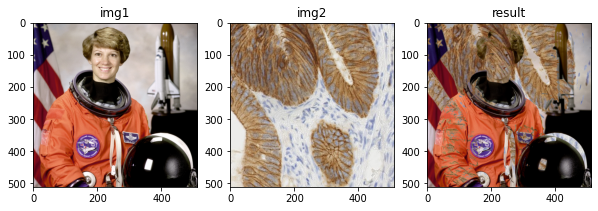

In [ ]:
#@title Choose aritmetic options. { run: "auto" }

format = 'YIQ' #@param ["RGB","YIQ"]
aritmetic = 'suma' #@param ["suma","resta"]
type_arit = 'if_darker' #@param ["clamping","average","if_lighter","if_darker"]

operations(img1,img2,aritmetic,type_arit,format)